Operator testing
=========

Use the following code to compare sample distributions from direct simulation with those from MCMC:

In [2]:
doCompare <- function(dsFileName, mcmcFileName) {
    dfs <- read.table(paste0("DirectSimulation/", dsFileName), header=T)
    df <- read.table(paste0("OperatorTests/", mcmcFileName), header=T)

    # Remove 10% for burnin
    N <- dim(df)[1]
    df <- df[-(1:ceiling(0.1*N)),]
    
    # Tree age/length plot
    
    maxLength <- quantile(df$tree.treeLength, probs=0.99)
    
    plot(density(df$tree.height), 'l', col='red', lwd=2, lty=2,
         xlim=c(0,maxLength),
         xlab="Statistic",
         main="")
    lines(density(dfs$tree.height), col='blue', lwd=2, lty=2)
    lines(density(df$tree.treeLength), col='red', lwd=2)
    lines(density(dfs$tree.treeLength), col='blue', lwd=2)
    legend("topright", inset=0.05,
       c("MCMC", "Direct simulation","Tree length", "Tree height"),
       lty=c(1,1,1,2), lwd=2, col=c("red","blue","black","black"))
    
    # Polytomy count plot
    
    maxCount <- max(df$PolytomyCount, dfs$PolytomyCount)+1
    h <- hist(df$PolytomyCount, plot=F,
              breaks=seq(-0.5,maxCount+0.5,by=1))
    hs <- hist(dfs$PolytomyCount, plot=F,
               breaks=seq(-0.5,maxCount+0.5,by=1))
    
    plot(h$mids, h$density, 'o', col='red', lwd=4,
        xlab="Polytomy Count",
        ylab="Posterior probability")
    lines(hs$mids, hs$density, 'o', col='blue', lwd=2)
    
    legend("topright", inset=0.04,
          c("MCMC", "Direct simulation"), lty=1, pch=1, lwd=2,
          col=c("red","blue"))
}

## SPR Test 1

Have implemented a single SPR operator that additionally creates and deletes multifurcations.  This is a universal operator which should traverse the entire space of trees supported by the $\beta$-coalescent.

This test involves using the SPR operator with polytomy creation turned on ($p=0.9$), sampling still from the pure coalescent distribution ($\alpha=2$):

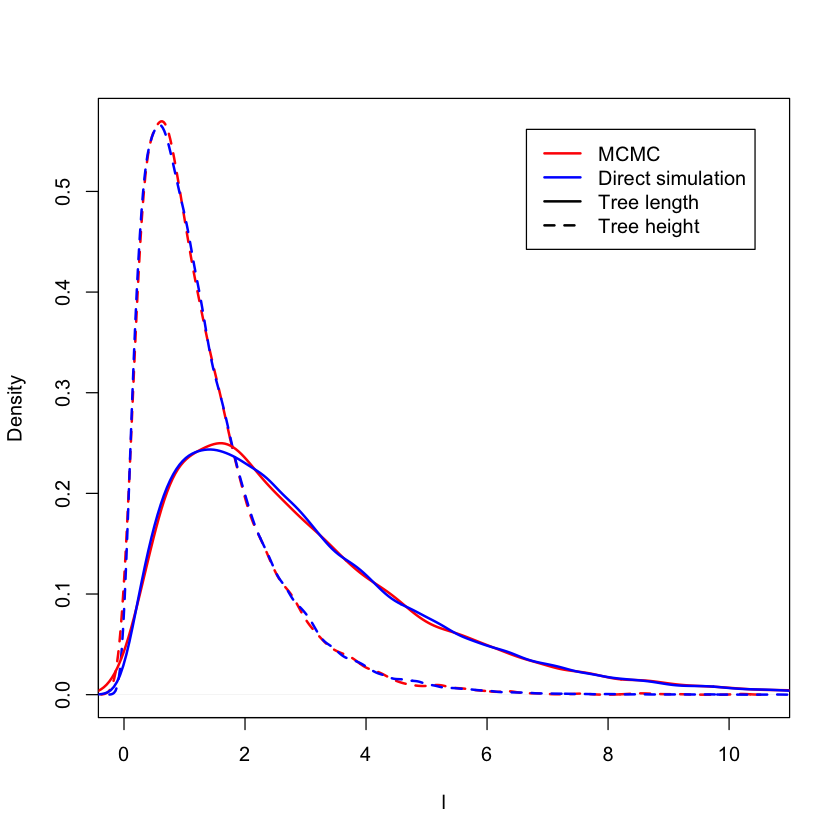

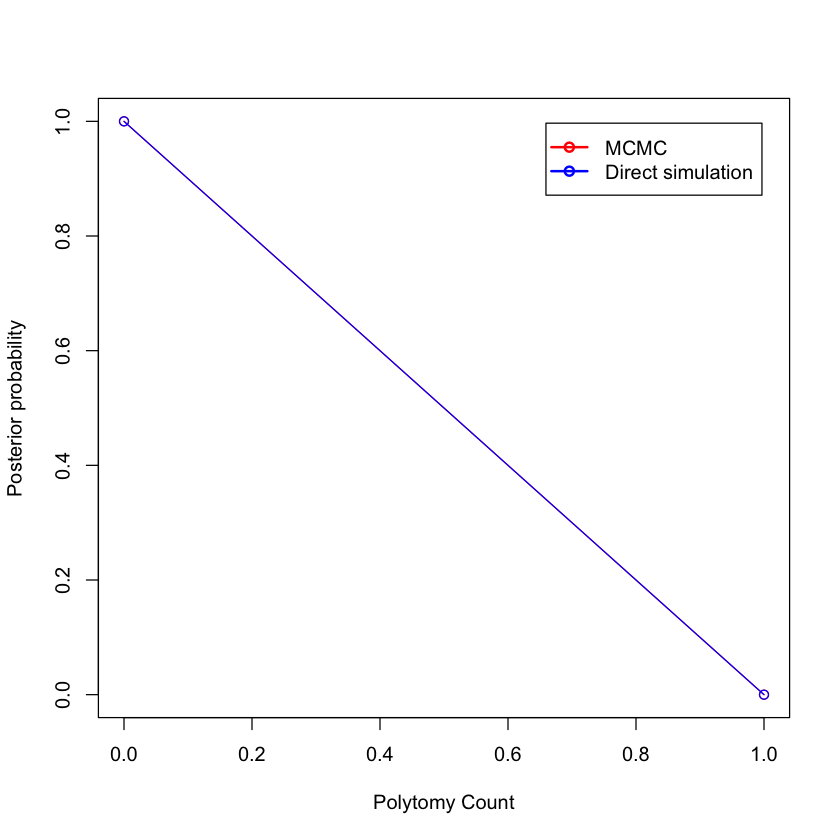

In [61]:
doCompare("simulate_3taxon_alpha2.log", "SPR_3taxon_alpha2.log")

## SPR Test 2

This test involves using the SPR operator with polytomy creation turned on ($p=0.9$) and with $\alpha=0.5$, meaning that we are now sampling from a non-trivial $\beta$-coalescent distribution.

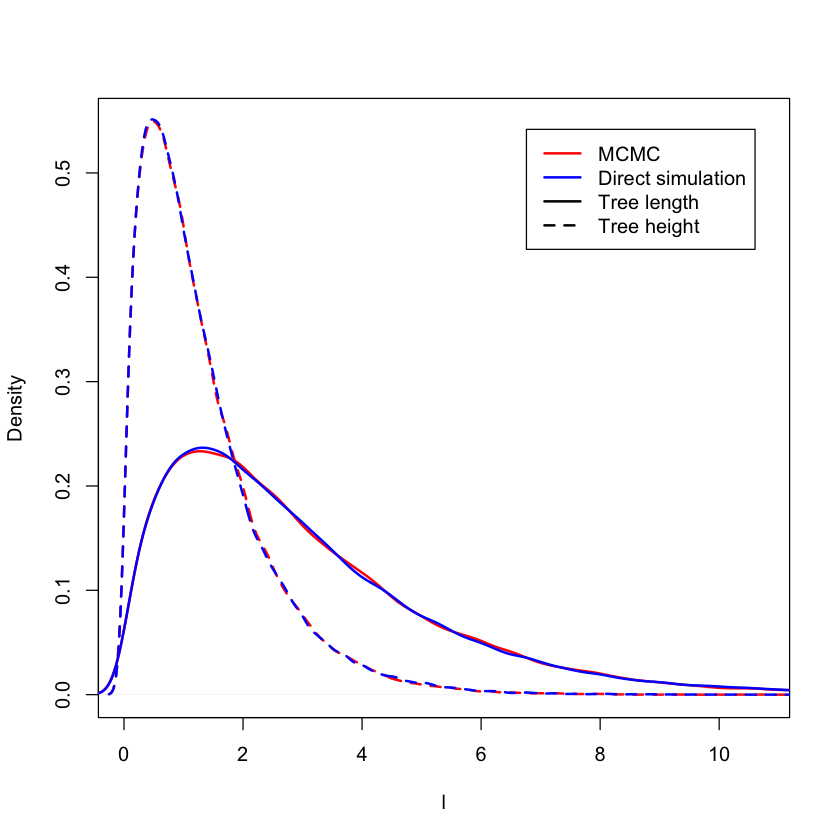

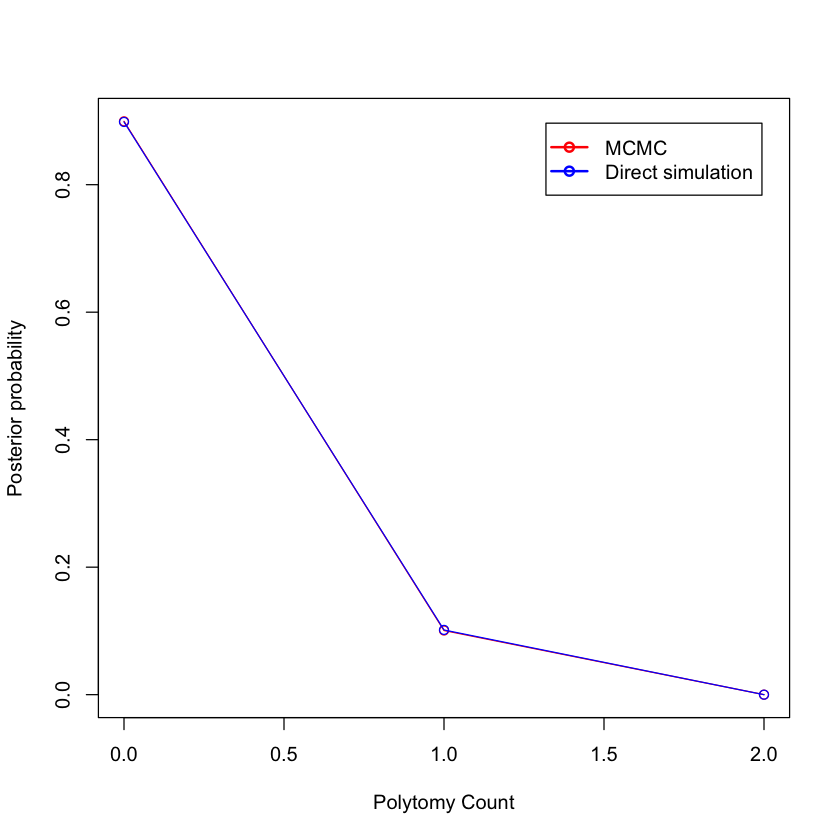

In [72]:
doCompare("simulate_3taxon_alpha1.5.log", "SPR_3taxon_alpha1.5.log")

## SPR Test 3

Here we use $\alpha=1.5$ but with the operator sampling the space of 5 taxon trees:

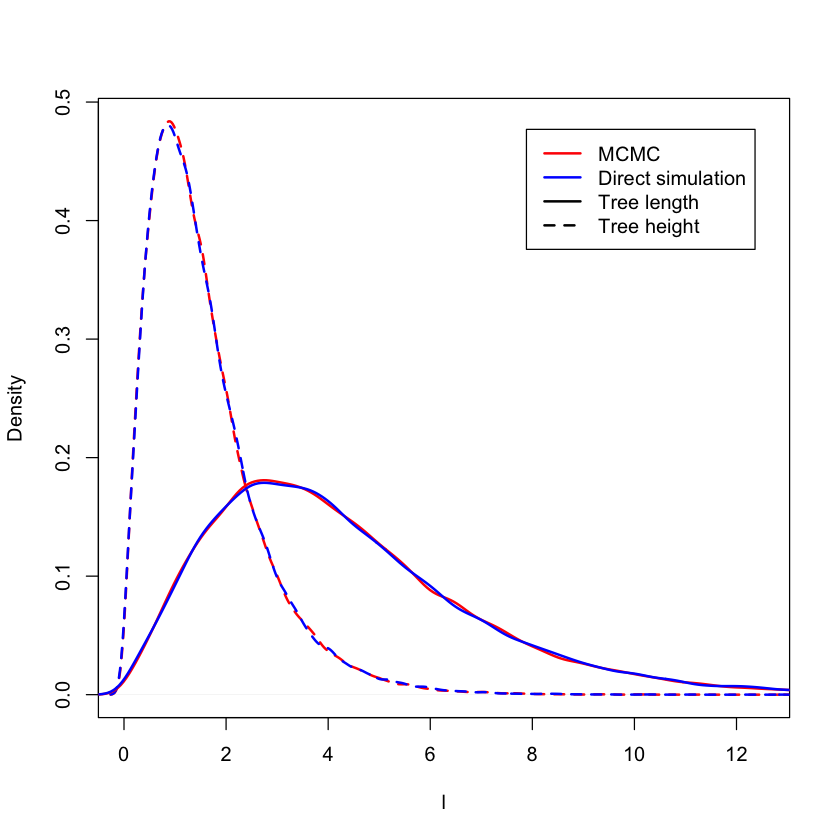

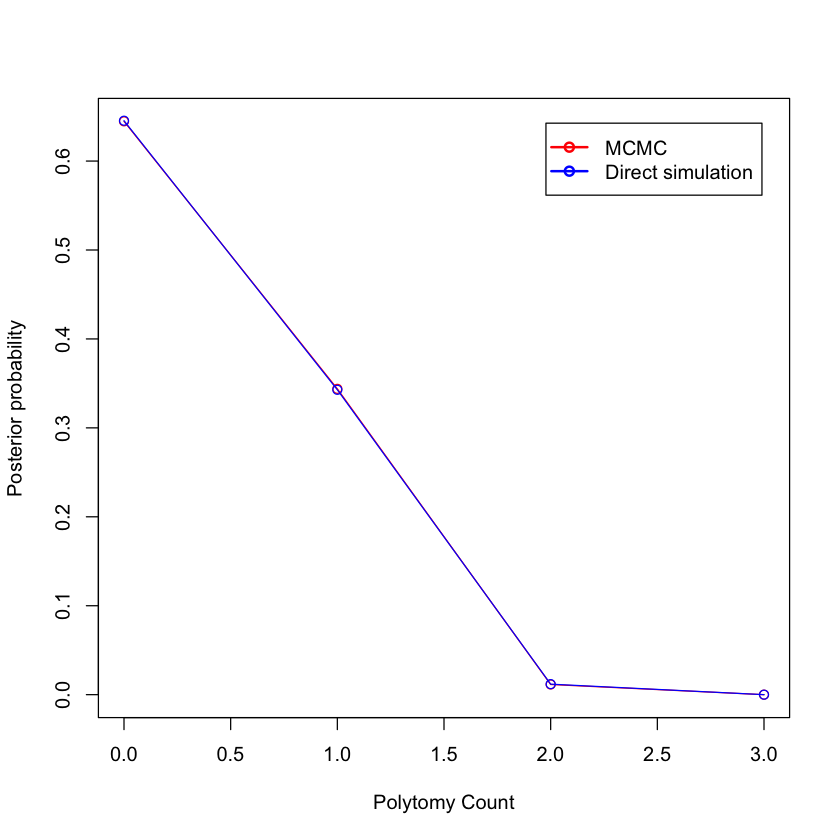

In [73]:
doCompare("simulate_5taxon_alpha1.5.log", "SPR_5taxon_alpha1.5.log")

## SPR Test 4

Here we use $\alpha=1.5$ but with the operator sampling the space of **serially sampled** 5 taxon trees:

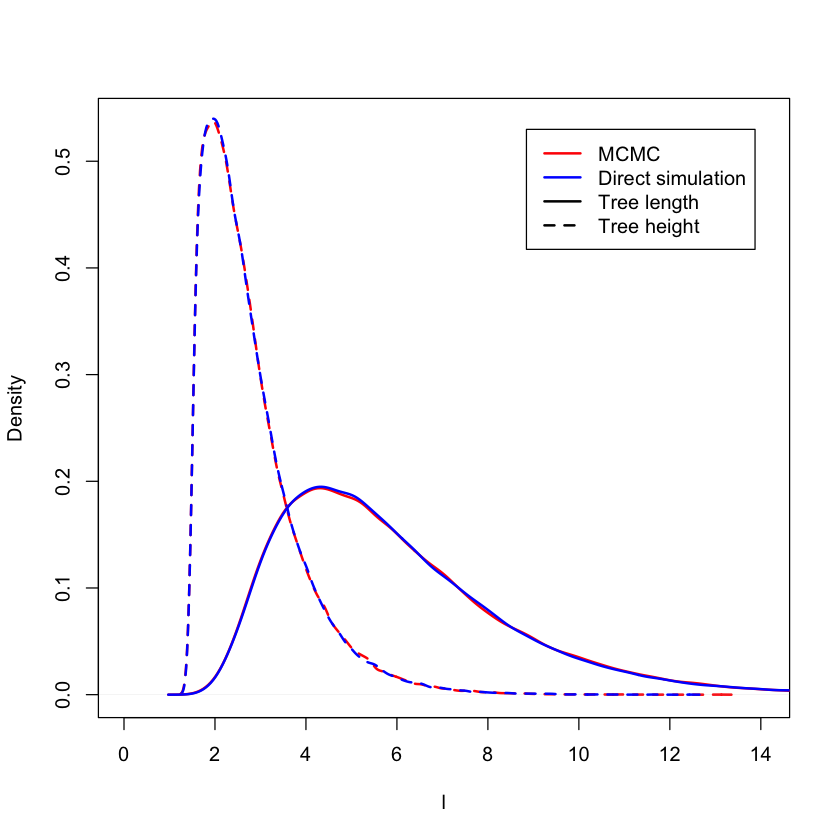

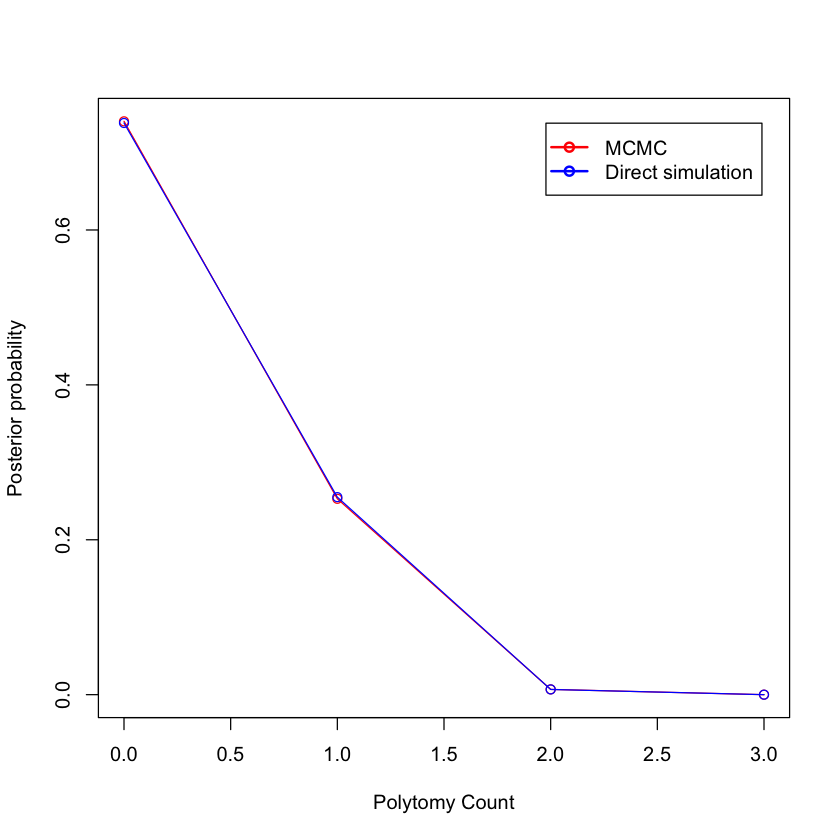

In [74]:
doCompare("simulate_5taxon_alpha1.5_serial.log",
          "SPR_5taxon_alpha1.5_serial.log")

## SPR + Uniform Test

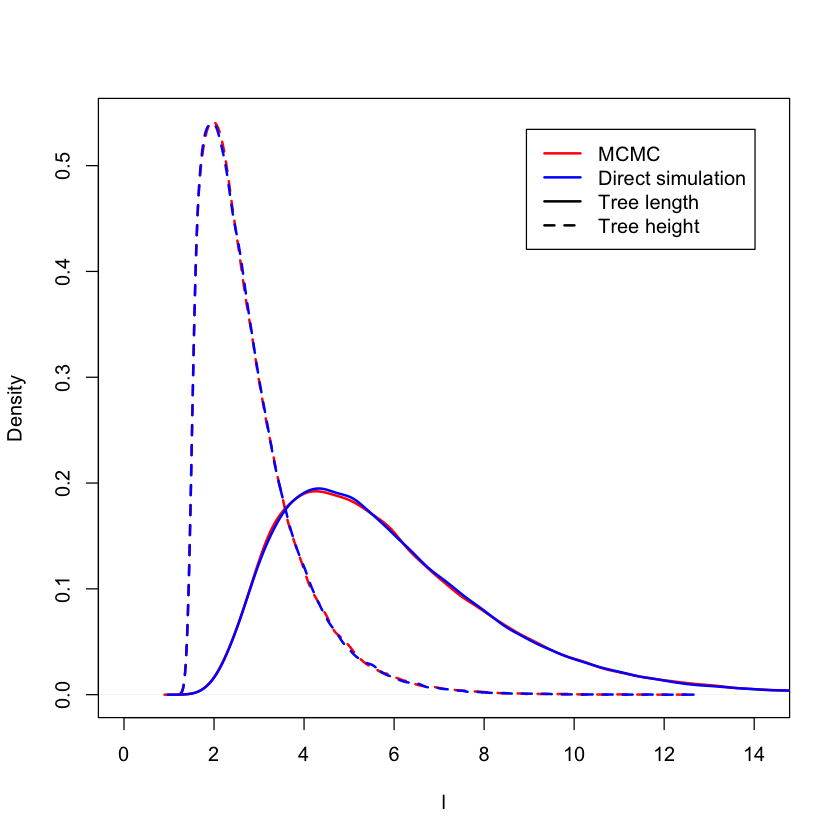

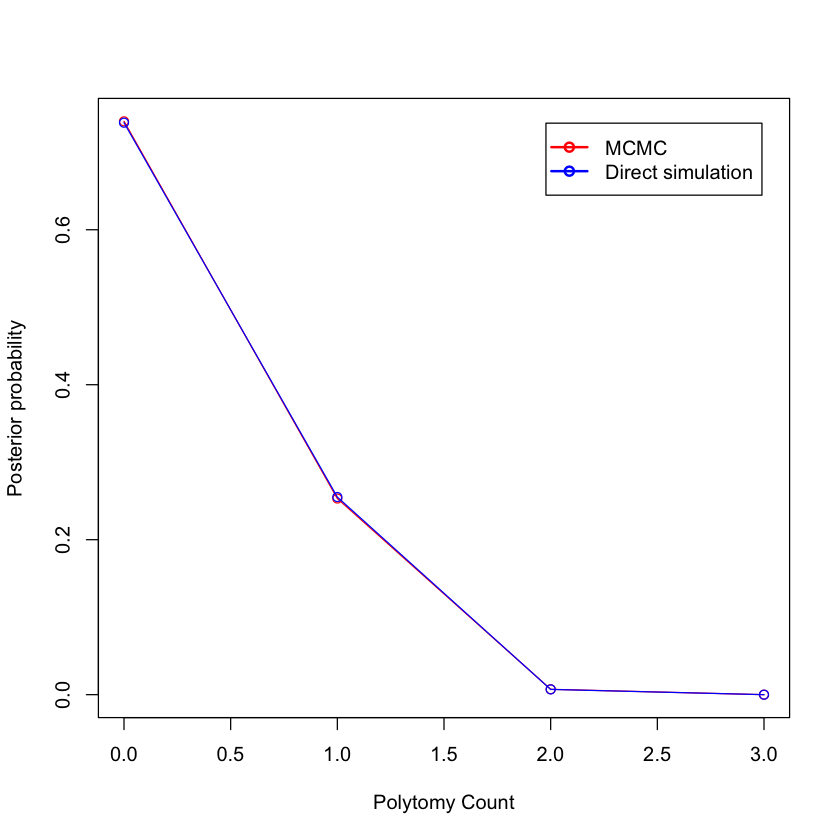

In [75]:
doCompare("simulate_5taxon_alpha1.5_serial.log",
          "SPR+Uniform_5taxon_alpha1.5_serial.log")

## SPR + ScaleOperator (unmodified)

The unmodified scale operator initially seems like it has a shot at being directly applicable to our style of polytomy tree, but there  a Hastings factor issue to do with the reduced number of independent variables (ages) being scaled:

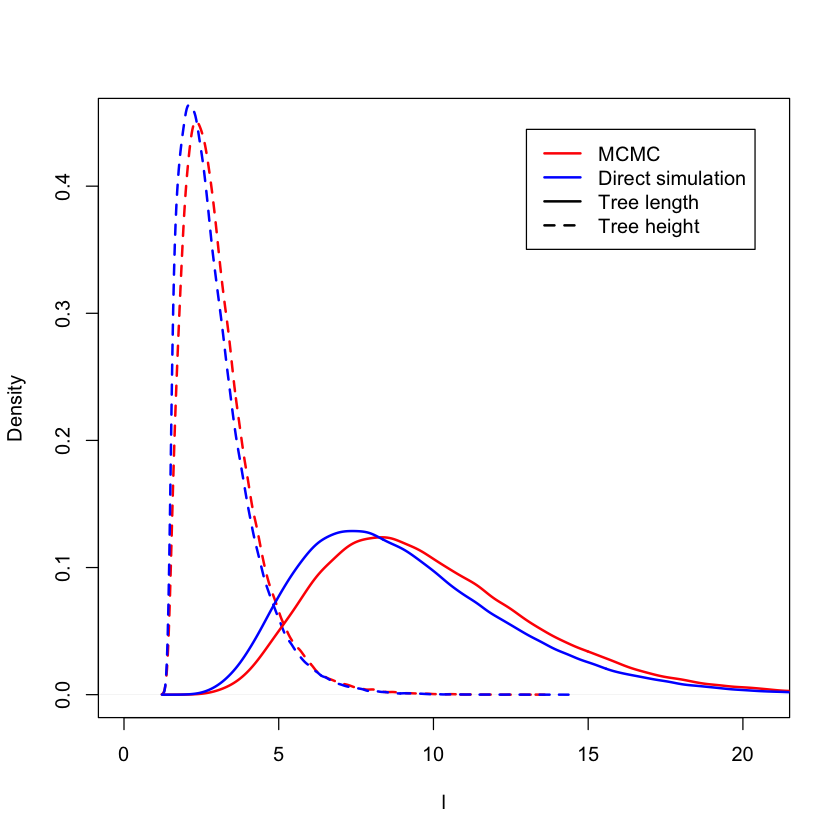

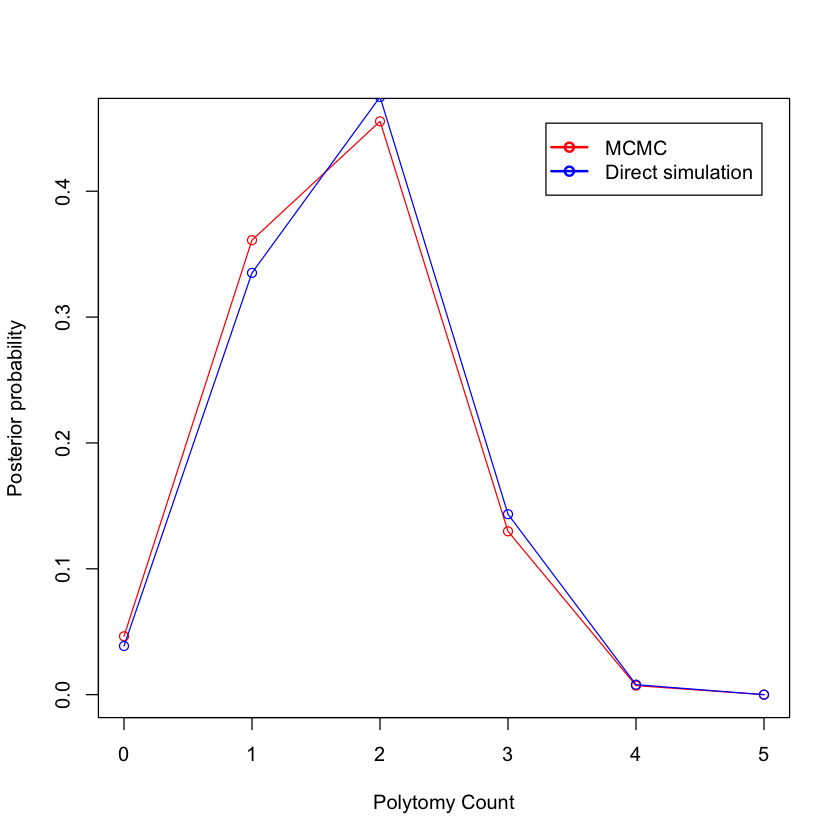

In [77]:
doCompare("simulate_10taxon_alpha1_serial.log",
          "SPR+UnmodifiedScale_10taxon_alpha1_serial.log")

## SPR + ScaleOperator (modified)

The modified scale operator correctly accounts for the actual number of distinct elements in the vector of node ages:

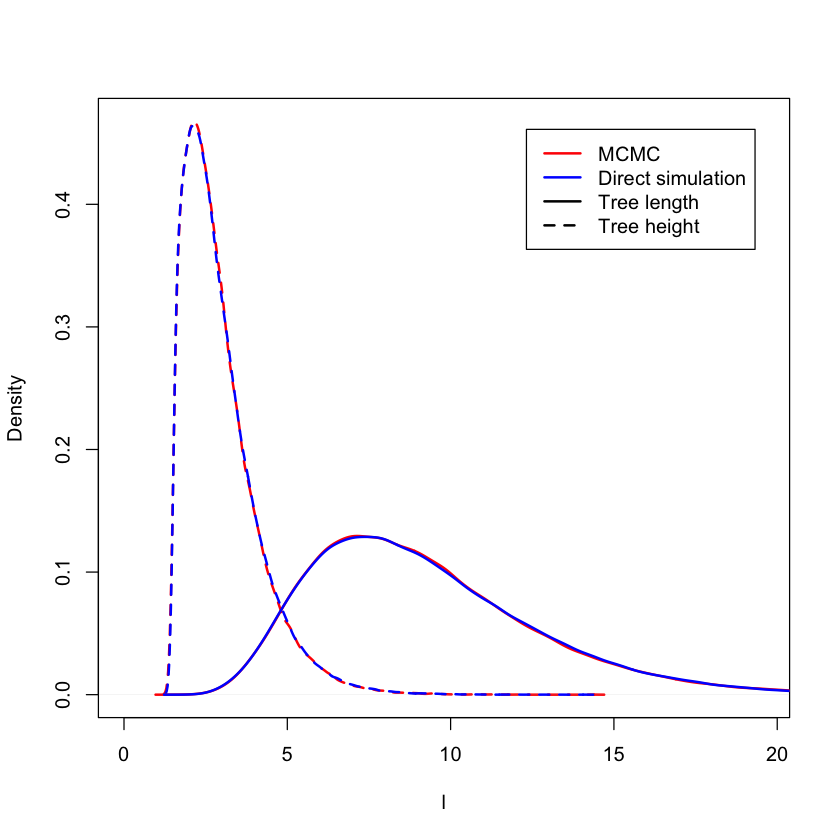

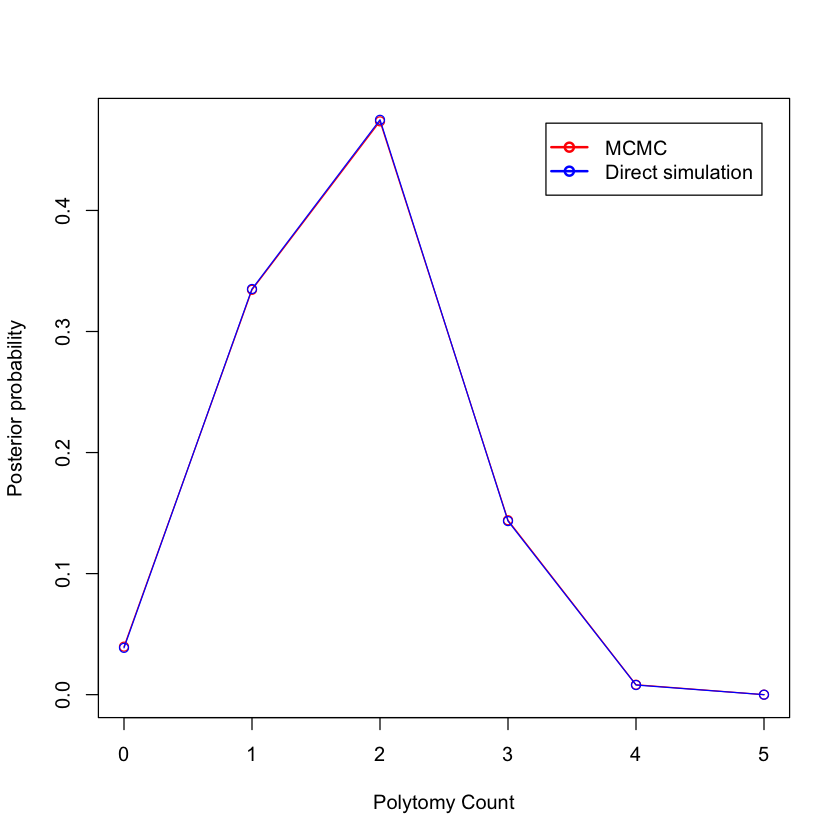

In [78]:
doCompare("simulate_10taxon_alpha1_serial.log",
          "SPR+ModifiedScale_10taxon_alpha1_serial.log")

## SPR + Exchange

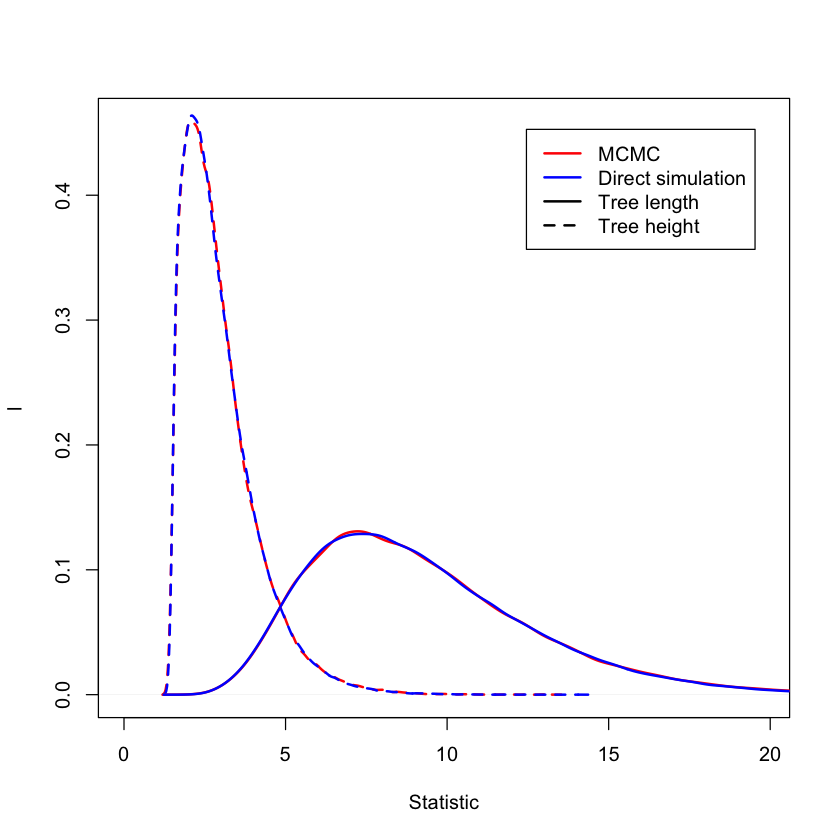

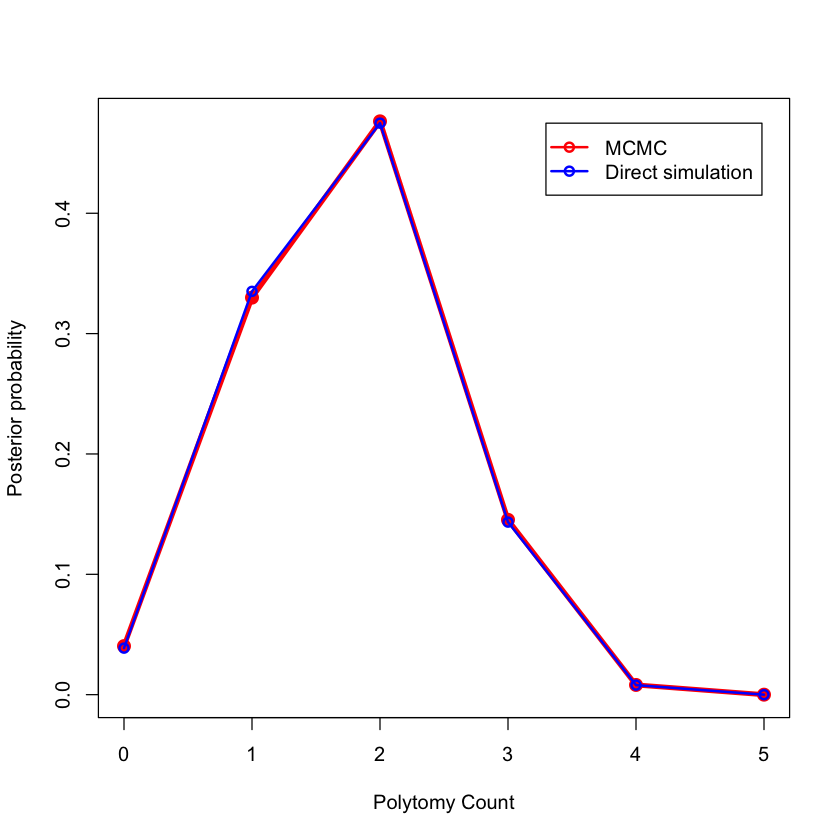

In [7]:
doCompare("simulate_10taxon_alpha1_serial.log",
          "SPR+Exchange_10taxon_alpha1_serial.log")

## SPR + Expand/Collapse

With this operator configuration, SPR no longer carries on its own the responsibility for creating/deleting polytomies. In this test, the SPR polytomy operations have therefore been disabled. (I.e. probCoalAttach=0).

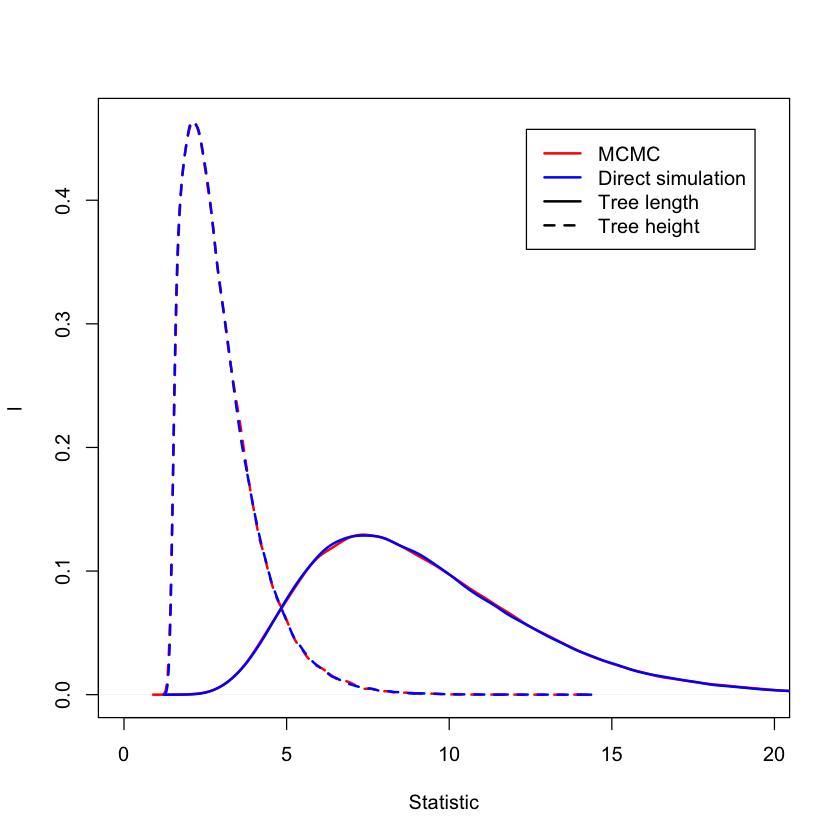

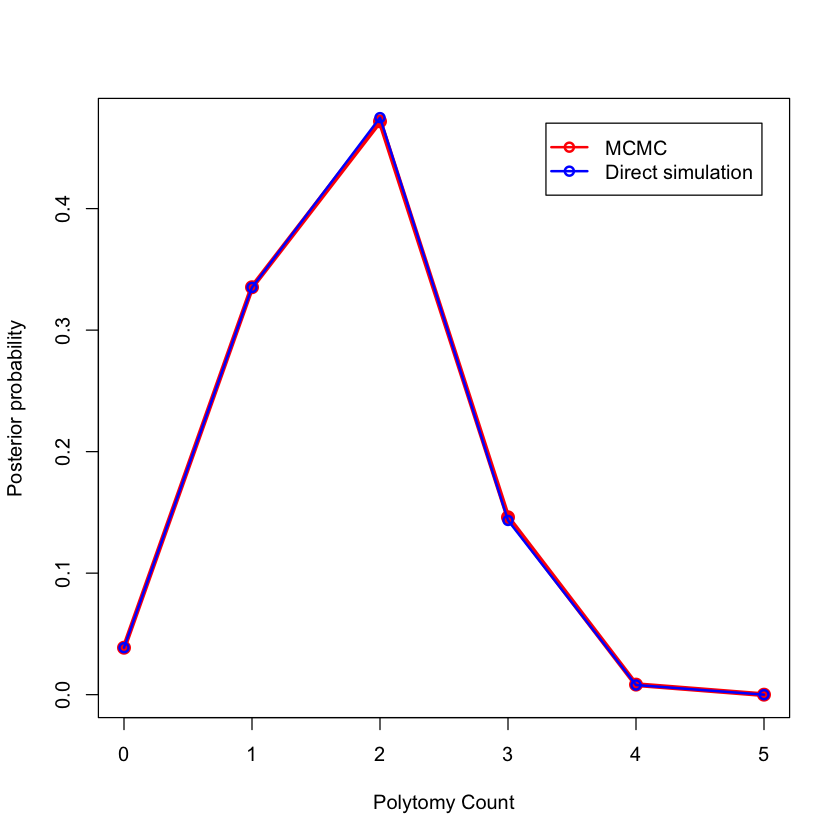

In [6]:
doCompare("simulate_10taxon_alpha1_serial.log",
          "SPR+ExpandCollapse_10taxon_alpha1_serial.log")

## Subtree Slide (no polytomies)

With polytomy creation turned off, the STS operator should be capable of correctly sampling the full state space of the Kingman coalescent.

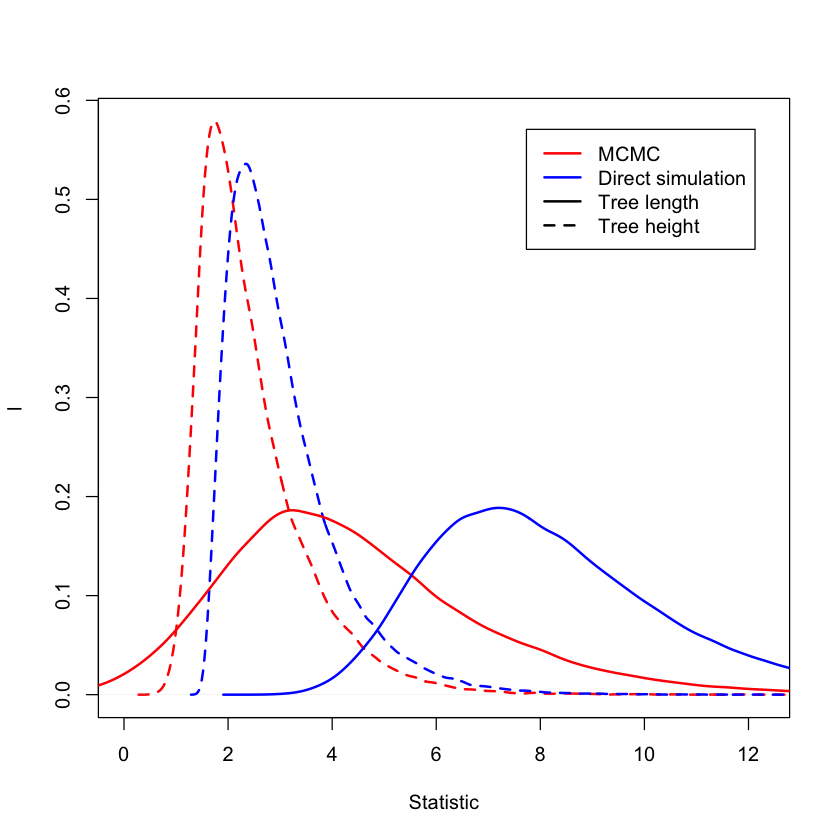

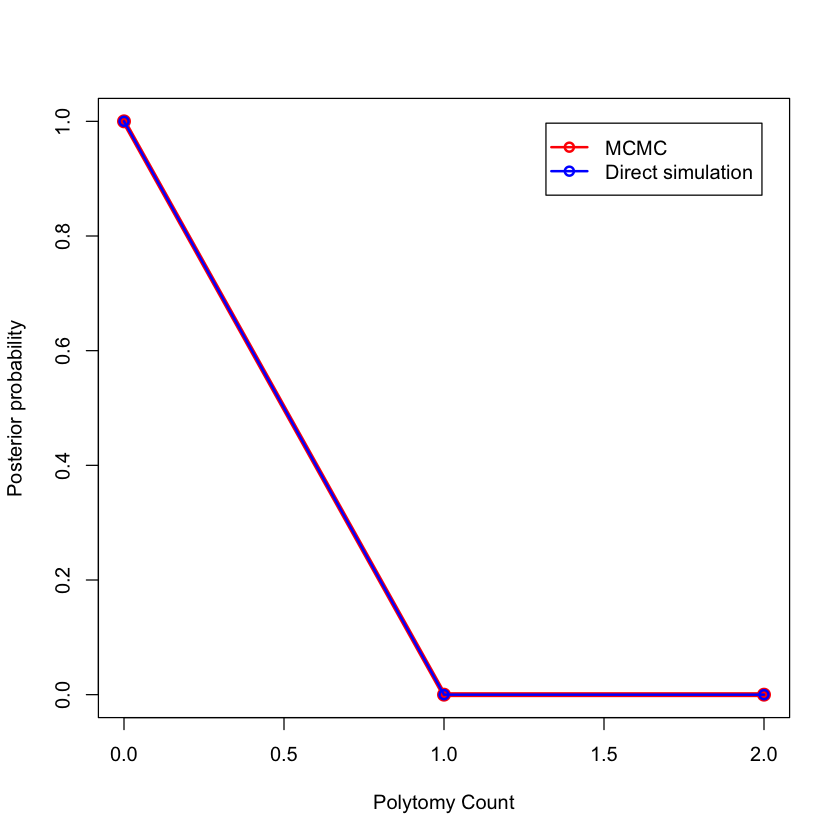

In [10]:
doCompare("simulate_10taxon_alpha2_serial.log",
          "SubtreeSlide_10taxon_alpha2_serial.log")